In [ ]:
import pyaudio
import wave
import matplotlib.pyplot as plt

CHUNK = 1024
FORMAT = pyaudio.paInt16
CHANNELS = 2
RATE = 44100
RECORD_SECONDS = 20
WAVE_OUTPUT_FILENAME = "output.wav"

p = pyaudio.PyAudio()

stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK)

print("* recording")

frames = []

for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(data)
   
print("* done recording")

stream.stop_stream()
stream.close()
p.terminate()

wf = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b''.join(frames))
wf.close()

In [5]:
import numpy as np
import pyaudio
import audioop
import wave
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib notebook

<IPython.core.display.Javascript object>


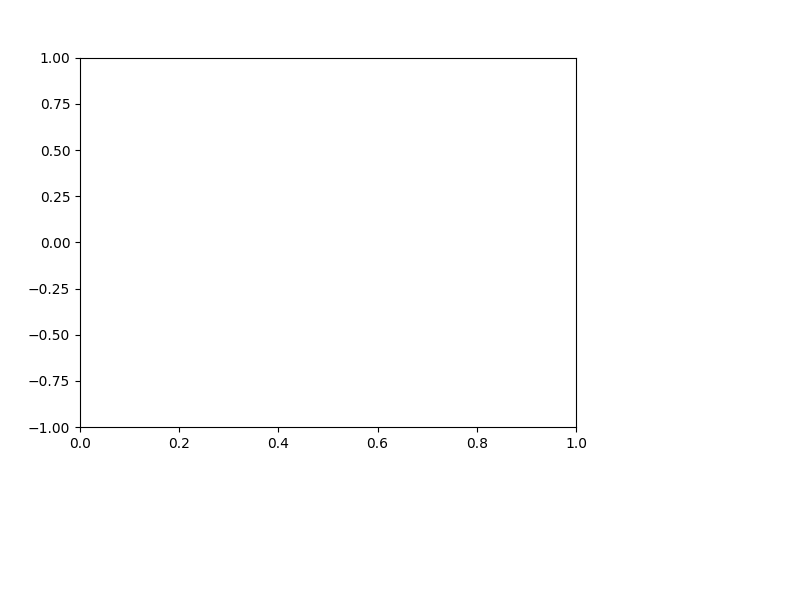

* recording


TypeError: a bytes-like object is required, not 'int'

In [6]:
%matplotlib notebook
CHUNK = 1024
FORMAT = pyaudio.paInt16
CHANNELS = 2
RATE = 44100
RECORD_SECONDS = 5


x = np.arange(0,1,1/(int(RATE / CHUNK)*1024*2))

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_ylim([-1,1])


plt.ion()

fig.show()
fig.canvas.draw()


p = pyaudio.PyAudio()

stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK)

print("* recording")

frames = []

for i in range(0, int(RECORD_SECONDS)):
    signal = []
    for j in range(0, int(RATE / CHUNK)):
        data = stream.read(CHUNK)      
        
        frames.append(data)
        
        y = np.fromstring(data,dtype=np.int16)
        signal = np.concatenate((signal,y), axis=None)


    ax.clear()
    ax.plot(x,signal)
    fig.canvas.draw()    
    
print("* done recording")

stream.stop_stream()
stream.close()
p.terminate()



In [ ]:
len(signal)/1024

In [ ]:
88064

In [ ]:
int(RATE / CHUNK)*1024*2

In [ ]:
x = np.arange(0,1,1/RATE)


In [ ]:
np.shape(x)

In [ ]:
print(RATE / CHUNK * RECORD_SECONDS, RATE, CHUNK, RECORD_SECONDS)


In [ ]:
import numpy as np
import pyaudio
import wave
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib notebook

In [ ]:
%matplotlib notebook

x = np.arange(0,100,1)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()

for i in range(0,100):
    ax.clear()
    y = np.random.normal(0,1,100)
    ax.plot(x,y)
    fig.canvas.draw()

In [ ]:
y = []

In [ ]:
yy = np.array([1,2,3,4,5])

In [ ]:
y= np.concatenate((y,yy), axis=None)
y

In [ ]:
y

In [ ]:
from scipy.io.wavfile import read
import matplotlib.pyplot as plt
%matplotlib notebook
# read audio samples
input_data = read("output.wav")
audio = input_data[1]
# plot the first 1024 samples
plt.plot(audio)
# label the axes
plt.ylabel("Amplitude")
plt.xlabel("Time")
# set the title  
plt.title("Sample Wav")
# display the plot
plt.show()

In [ ]:
# Load the required libraries:
#   * scipy
#   * numpy
#   * matplotlib
from scipy.io import wavfile
from matplotlib import pyplot as plt
import numpy as np

# Load the data and calculate the time of each sample
samplerate, data = wavfile.read('output.wav')
times = np.arange(len(data))/float(samplerate)

# Make the plot
# You can tweak the figsize (width, height) in inches
plt.figure(figsize=(30, 4))
plt.fill_between(times, data[:,0], data[:,1], color='k') 
plt.xlim(times[0], times[-1])
plt.xlabel('time (s)')
plt.ylabel('amplitude')
# You can set the format by changing the extension
# like .pdf, .svg, .eps
plt.show()
